import numpy as np
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor

In [3]:
import numpy as np
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
history = pd.read_excel('history.xlsx')

In [4]:
X = history.as_matrix()[:, 1:]

In [5]:
predict =pd.read_excel('predict.xlsx')

In [6]:
predict.head()

,Time,X benchmark
0,2004-11-23,447.05
1,2004-11-24,449.55
2,2004-11-25,451.69
3,2004-11-26,451.95
4,2004-11-27,451.95


In [65]:
Y = predict.as_matrix()[:, 1:].reshape(-1)

In [22]:
X_train, X_test = X[:3300], X[3300:]
y_train, y_test = Y[:3300], Y[3300:]

In [29]:
est = GradientBoostingRegressor(n_estimators=100000, learning_rate=0.01, max_depth=5, random_state=0, loss='ls').fit(X_train, y_train)

In [30]:
mean_squared_error(y_test, est.predict(X_test)) 

29187.148668100883

In [44]:
history.head()

,Time,TIPS-5Y,TIPS-10Y,TIPS-20Y,TIPS-30Y,TIPS-LONG,UST Bill 1-Y RETURN,UST BILL 10-Y RETURN,SP500,LIBOR-OVERNIGHT,COMEX-NC-LONG,COMEX-NC-SHORT,COMEX-NC-NET,SPDR:t,USD/CNY
0,2004-11-23,0.93,1.65,2.04,0.0,2.04,0.0,4.188,1176.94,2.05000,202921,64289,138632,87.09,8.2765
1,2004-11-24,0.93,1.64,2.03,0.0,2.04,0.0,4.203,1181.76,2.05250,202921,64289,138632,96.42,8.2765
2,2004-11-25,0.93,1.64,2.03,0.0,2.04,0.0,4.203,1181.76,2.05250,202921,64289,138632,96.42,8.2765
3,2004-11-26,0.94,1.66,2.06,0.0,2.07,0.0,4.178,1182.65,2.05125,202921,64289,138632,100.46,8.2765
4,2004-11-27,0.94,1.66,2.06,0.0,2.07,0.0,4.178,1182.65,2.05125,202921,64289,138632,100.46,8.2765


In [47]:
df = history.copy()
del df['Time']
df_norm = (df - df.mean()) / (df.max() - df.min())
df_norm.plot(figsize=(20, 10))

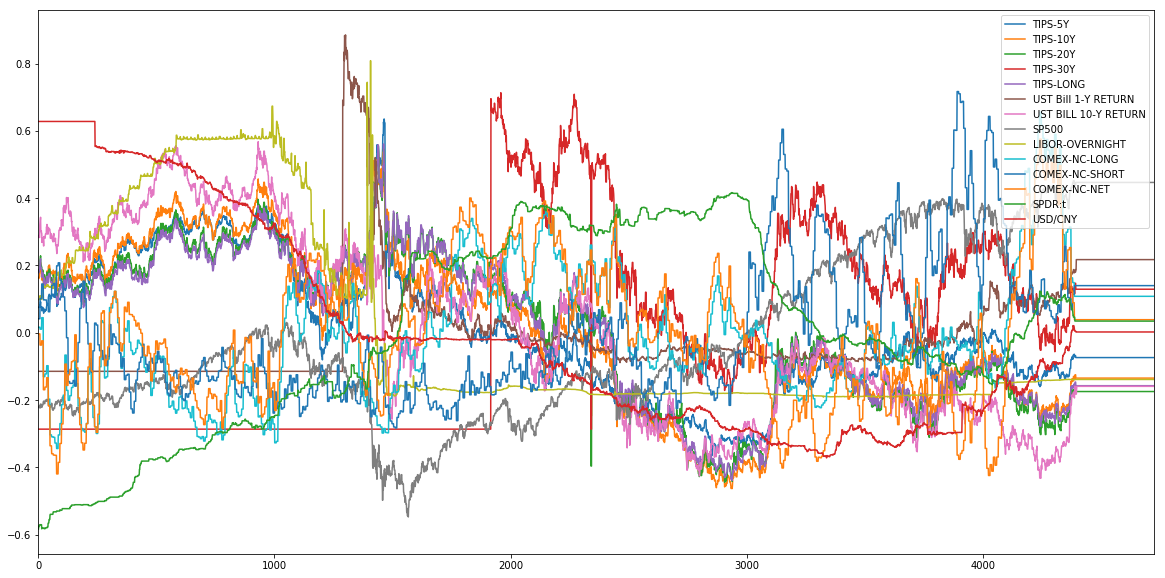

In [48]:
plt.show()

In [233]:
f, ax = plt.subplots(4, 4, sharex=True, figsize=(20,10))

In [234]:
predict.plot(title="X benchmark trend Unit: x/d", ax=ax[0][0], color=tuple(tuple(e) for e in np.random.rand(1, 3).tolist()))
history['TIPS-5Y'].plot(title='history TIPS-5Y', ax=ax[0][1], color=((0.1, 0.2, 0.3)))
history['TIPS-10Y'].plot(title='history TIPS-10Y', ax=ax[0][2], color=((0.2, 0.1, 0.9)))
history['TIPS-20Y'].plot(title='history TIPS-20Y', ax=ax[0][3], color=((0.1, 0.27, 0.2)))
history['TIPS-30Y'].plot(title='history TIPS-30Y', ax=ax[1][0], color=((0.1, 0.6, 0.3)))
history['TIPS-LONG'].plot(title='history TIPS-LONG', ax=ax[1][1], color=((0.6, 0.2, 0.3)))
history['UST Bill 1-Y RETURN'].plot(title='history UST Bill 1-Y RETURN', ax=ax[1][2], color=((0.6, 0.7, 0.3)))
history['UST BILL 10-Y RETURN'].plot(title='history UST BILL 10-Y RETURN', ax=ax[1][3], color=((0.8, 0.4, 0.3)))
history['SP500'].plot(title='history SP500', ax=ax[2][0], color=((0.1, 0.6, 0.3)))
history['LIBOR-OVERNIGHT'].plot(title='history LIBOR-OVERNIGHT', ax=ax[2][1], color=((0.2, 0.2, 0.65)))
history['COMEX-NC-LONG'].plot(title='history COMEX-NC-LONG', ax=ax[2][2], color=((0.1, 0.62, 0.32)))
history['COMEX-NC-SHORT'].plot(title='history COMEX-NC-NET', ax=ax[2][3], color=((0.71, 0.12, 0.3)))
history['SPDR:t'].plot(title='history SPDR:t', ax=ax[3][0], color=((0.81, 0.12, 0.43)))
history['USD/CNY'].plot(title='USD/CNY', ax=ax[3][1], color=((0.1, 0.62, 0.3)))

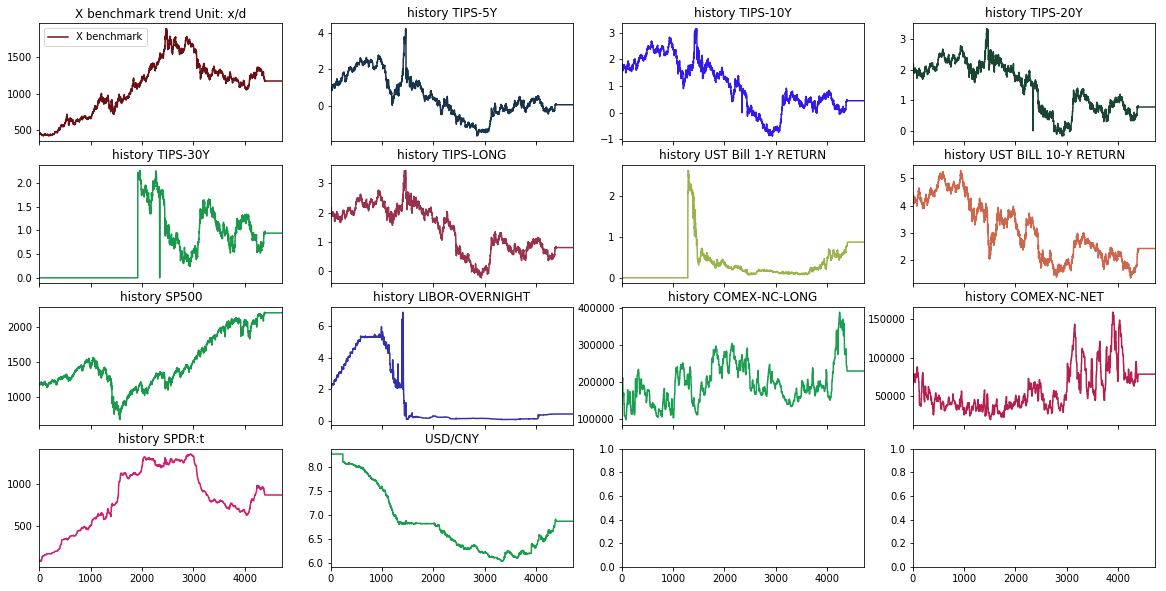

In [235]:
plt.savefig('x.png')
plt.show()